# APS1070
#### Project 1 --- Basic Principles and Models
**Deadline: Oct 6th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: _**Yuchen Ding**__  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: _**1010743420**__

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [boston dataset](https://openml.org/search?type=data&status=any&id=43465). Download it using the cell below:

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? _**13**_
* Determine the median target value. __**21.2**_
* How many participants have a target value greater than the median target value? _**250**__

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the owner-occupied homes value in \$1000's below median or the owner-occupied homes value in \$1000's above median. **[0.5]**

In [2]:
#Get number of features in the dataset
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
print("Number of features:",df.shape[1])

Number of features: 13


In [3]:
#Get target data and find the median target value
target_data = dataset.target
target_names = dataset.target_names
median=np.median(target_data)
print(median)

21.2


In [4]:
#Find number of participants greater than median target value
target_data
count=0
for i in target_data:
  if i > 21.2:
    count+=1
print(f"There are {count} participants have target value greater than median target value")

There are 250 participants have target value greater than median target value


In [5]:
target_data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [6]:
#Create a blank new list, using for loop to identify 1 and 0 and store in the new list, finally add the new list as comlumn into df
new_column_list = []

for value in target_data:
    if value > median:
        new_column_list.append(1)
    else:
        new_column_list.append(0)

df['new_target'] = new_column_list

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [7]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

feature_data=df.drop('new_target',axis=1)
target_data=df['new_target']

X_train, X_test, y_train, y_test = train_test_split(feature_data,target_data,test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**


Text(0.5, 1.0, 'Raw Data Display')

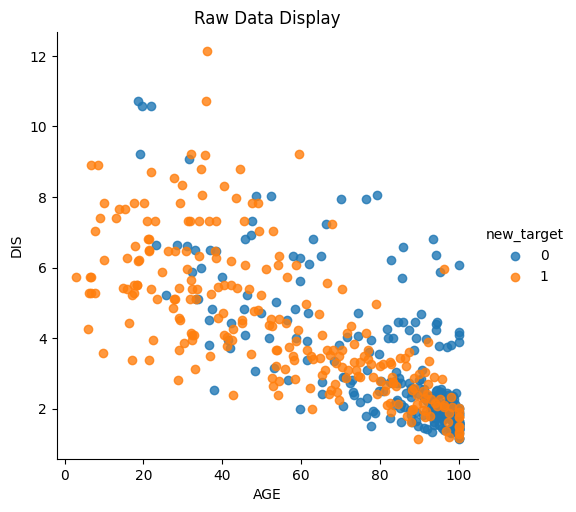

In [8]:
import seaborn as sns

# Visualize the unstandardized data
# Color is in two categories 0 and 1, which is the new target value

sns.lmplot(data=df, x="AGE", y="DIS",hue='new_target',fit_reg=False)
plt.title('Raw Data Display')

   AGE_standardized  DIS_standardized
0         -0.119895          0.140075
1          0.366803          0.556609
2         -0.265549          0.556609
3         -0.809088          1.076671
4         -0.510674          1.076671


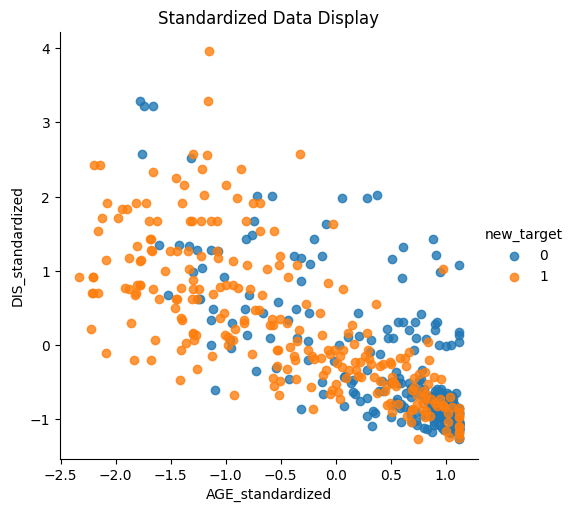

In [9]:
# Calculate the mean and std value
df_standardize=df.copy()

age_mean=df['AGE'].mean()
dis_mean=df['DIS'].mean()
age_std=df['AGE'].std()
dis_std=df['DIS'].std()

# Get the standardized data
df_standardize['AGE_standardized'] = (df['AGE'] - age_mean) / age_std
df_standardize['DIS_standardized'] = (df['DIS'] - dis_mean) / dis_std

print(df_standardize[['AGE_standardized', 'DIS_standardized']].head())

# Visualize the standardized data
sns.lmplot(data=df_standardize,x='AGE_standardized', y='DIS_standardized', hue='new_target', fit_reg=False)
plt.title('Standardized Data Display')
plt.show()


By compairing the unstandardized and standardized data, the distribution shape of the plot remains same. However, the x_scale and y_scale range reduces significantl, and the standardized data would surrounded by 0.

The reason that both plots look similar is that the standardization formula will not change the scale and distribution of the originial data plot.

The advantage of applying standardization could help restrict the scale of plot to a acceptable range. If the unstandardized data range is significant high such as 1-1000000, it will cost ML algorithm much more time to proceed. When we concentrate our data into a much smaller range, the plot will be more explicit and simultaneously enhance the ML processing speed.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



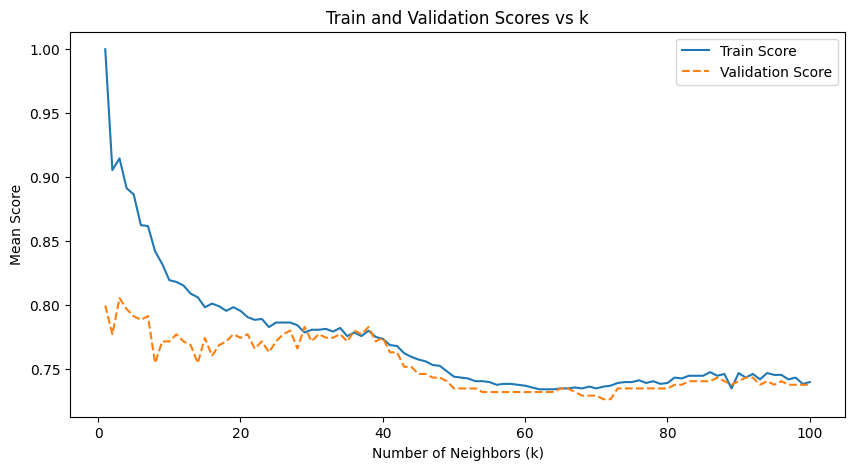

In [10]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

# Set X be the feature data that contains all the features
# Set y be the new target data which only contains 0 and 1

X=X_train
y=y_train

# Create k_list list to perform knn for k-value from 1 to 100, will be applied throughout this project
# Create train and validation list to store the score data

k_list=np.arange(1,101)
train_score=[]
validation_score=[]

# Using for loop to implement knn 100 times and store train and validation score
for k in k_list:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X, y, cv=5, return_train_score=True)
  train_score.append(np.mean(scores['train_score']))
  validation_score.append(np.mean(scores['test_score']))

# Plot Train and Validation Scores
plt.figure(figsize=(10, 5))
plt.plot(k_list, train_score, label='Train Score')
plt.plot(k_list, validation_score, label='Validation Score', linestyle='dashed')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Score')
plt.title('Train and Validation Scores vs k')
plt.legend()
plt.show()


In [11]:
# Find the best by looking for the location of highest validation score，while the training score is high and their difference is low

# Select k range 20-40, find best validation score and k index
sub_list=validation_score[20:40]
best_testscore = max(sub_list)
best_kindex = sub_list.index(best_testscore)+20

# The following best_kindex plus one due to k traversal from 1-100, but test_score index starts from 0
print(f"The best k value is: {best_kindex+1}, while it generates best validation score: {best_testscore}")


The best k value is: 29, while it generates best validation score: 0.78261569416499


In [12]:
print(f'The highest cross-validation accuracy is: {max(validation_score)}.\nHowever, the corresponding k-value for this accuracy is 3')

The highest cross-validation accuracy is: 0.8051509054325955.
However, the corresponding k-value for this accuracy is 3


Part 3: When k=1, the knn model will seperate each data point into a independent neighborhood, which causes every data point fits the model and leads to training score=1 and accuracy is highest. However, this situation causes the model overfit because when it comes to the testing set, the new input data could not identify the appropriate neighbor they should be.

As we increase the k value, the descending number of neighbors will gradually cause trainingscore to decrease and validation score to fluctuate because the model are moving from overfit to underfit. After the model comes to optimum k interval (training and validation score are relative high and similar), the best fit of k exists when it reaches the highest validation score in that interval.

When we continuously increase the k value as k greater than 40, the training and validation score will decrease and thus leads to underfitted model. Under the situation of large k in knn model, the number of classes will decrease and the amount of data points in each class will robust, which restrict the model to learn the modes of each class. When it comes to testing, the score will decrease as the model is too simple.

Overall, in range k=1 to k=10, the model is overfit. from k>=40, the model becomes underfit.


## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [13]:
def Feature_selector (X_train , y_train , tr=0.95):
  # Step 1: Find the importance score using dt classifier, return to importance list

  from sklearn import tree
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)

  # Step 2: Extracts the feature importance order of the decision tree model
  importance = dt.feature_importances_

  X_train_copy = X_train.copy()
  f_name_list = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

  removed_features_list = []  # To store the features that are removed in each iteration
  best_validation_list = []
  best_k_list = []

  loop_sign = 0 # While loop to execute the feature removal 12 times till one feature left
  while loop_sign < 12:

    best_validation_score = 0
    best_k_value = 0

    # Step 3: Removes the least important feature based on step 2
    least_importance_index = np.argmin(importance) # return least importance index
    X_train_copy = X_train_copy.drop(f_name_list[least_importance_index],axis=1)

    removed_features_list.append(f_name_list[least_importance_index]) # Store removed feature into list
    print(f"The removed feature list of X_train in the {loop_sign+1}th iteration is: {removed_features_list}")

    # Step 4: Perform KNN and CV
    for k in k_list:
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_train_copy, y_train, cv=5, return_train_score=True)
      mean_score = scores['test_score'].mean()

      if mean_score > best_validation_score: # store best validation score and corresponding k value
        best_validation_score = mean_score
        best_k_value = k

    # Step 5: Store best cv score and k value into two lists
    best_validation_list.append(best_validation_score)
    best_k_list.append(best_k_value)

    # Step 7: loop stop condition, max(validation score) refers to the max cv score in part 2
    if best_validation_score < tr * max(validation_score): # if less than threshold*full cv score, loop stops
      break

    del f_name_list[least_importance_index] # delete the removed feature
    importance = np.delete(importance, least_importance_index) # delete the importance score related to removed feature

    loop_sign += 1

  print(best_k_list)
  print(best_validation_list)

  # Step 8: Return removed feature list, best k list, best cv score list
  return best_k_list, best_validation_list, importance

best_k_list, best_validation_list, importance = Feature_selector(X_train, y_train, tr=0.95)



The removed feature list of X_train in the 1th iteration is: ['CHAS']
The removed feature list of X_train in the 2th iteration is: ['CHAS', 'RAD']
The removed feature list of X_train in the 3th iteration is: ['CHAS', 'RAD', 'INDUS']
The removed feature list of X_train in the 4th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX']
The removed feature list of X_train in the 5th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN']
The removed feature list of X_train in the 6th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX']
The removed feature list of X_train in the 7th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B']
The removed feature list of X_train in the 8th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM']
The removed feature list of X_train in the 9th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM', 'PTRATIO']
The removed feature list of X_train in the 10th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B

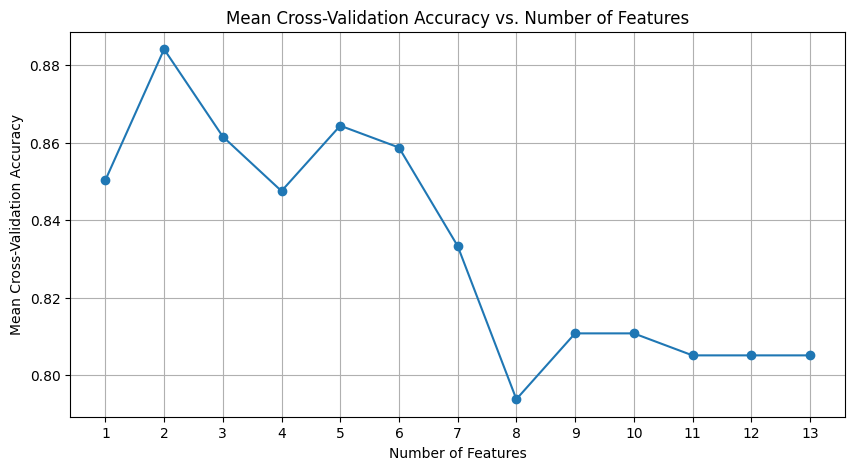

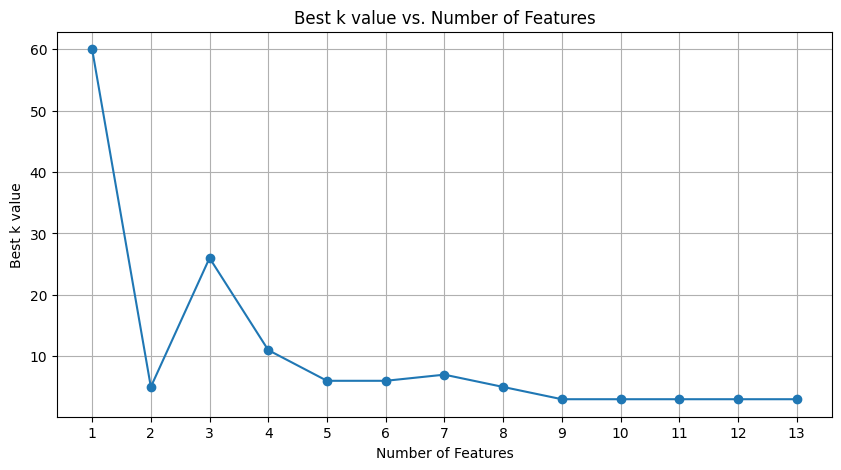

In [14]:
# Insert the full feature best validation and k value from part 2 into the lists,
best_k_list.insert(0,3)
best_validation_list.insert(0,max(validation_score))

# Create index for number of features for plotting
number_of_features = list(range(len(best_validation_list), 0, -1))

# Plot mean cross-validation accuracy vs. number of features
plt.figure(figsize=(10,5))
plt.plot(number_of_features, best_validation_list, marker='o')
plt.title('Mean Cross-Validation Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.xticks(number_of_features)
plt.show()

# Plot best k value vs. number of features
plt.figure(figsize=(10,5))
plt.plot(number_of_features, best_k_list, marker='o')
plt.title('Best k value vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Best k value')
plt.grid(True)
plt.xticks(number_of_features)
plt.show()


In [15]:
print(f'The last feature LSTAT remained in the X_train has importance score of : {importance}')

The last feature LSTAT remained in the X_train has importance score of : [0.59035767]


After implementing feature removal for 12 iterations according to the least importance score,the best k value increase as we remove the low_importance_score feature from X_train. The cross validaiton accuracy also increases as we remove the low-importance score.

First of all, the "LSTAT" should be considered as essential features as it the last feature that remains in x_train, which means it has largest importance score.

Furthermore,from the cross validation accuracy plot, we can see that there are three major descending trend occured. First is when we remove the 12th feature 'RM', the second is when we remove the 9th feature 'PTRATIO', and the last is when we remove the 5th feature 'ZN'. These three features are all essential for classification these data are helpful for the model to train data or the data provides useful guidance to the KNN model. The removal of these features would cause model performance to decrease.

For the remaining feature removal that help the model CV accuracy improve, these features are not essential because the feature itself does not help on the performance of the model but create distubance.


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance?


In [16]:
### YOUR CODE HERE ###

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Creating standardized x-train and x-test dataframe

def Feature_selector (X_train_scaled , y_train , tr=0.95):
  from sklearn import tree
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train_scaled,y_train)
  importance = dt.feature_importances_
  # Find the importance score using dt classifier, return to importance list

  X_train_scaled_copy = X_train_scaled.copy()
  f_name_list = X_train_scaled.columns.tolist()

  removed_features_list_scaled = []  # To store the features that are removed in each iteration
  best_validation_list_scaled = []
  best_k_list_scaled = []

  # Using while loop to execute the feature removal 13 iterations till one feature left
  # The 0th iteration is for full feature cv and k calculation
  loop_sign = 0
  while loop_sign <= 12:

    best_validation_score = 0
    best_k_value = 0

    for k in k_list:
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_train_scaled_copy, y_train, cv=5, return_train_score=True)
      mean_score = scores['test_score'].mean() # store cross validation accuracy into mean_score list

      if mean_score > best_validation_score: # store best validation score and corresponding k value
        best_validation_score = mean_score
        best_k_value = k

    # Add best k and cv score into both lists
    best_validation_list_scaled.append(best_validation_score)
    best_k_list_scaled.append(best_k_value)


    least_importance_index = np.argmin(importance) # return least importance index
    X_train_scaled_copy = X_train_scaled_copy.drop(f_name_list[least_importance_index],axis=1)

    # store removed feature into list
    removed_features_list_scaled.append(f_name_list[least_importance_index])
    print(f"The removed feature list of X_train in the {loop_sign+1}th iteration is: {removed_features_list_scaled}")

    # if less than threshold*full cv score, loop stops
    if best_validation_score < tr * max(validation_score):
      break

    del f_name_list[least_importance_index] # delete the removed feature from list
    importance = np.delete(importance, least_importance_index) # delete the importance score for removed feature

    loop_sign += 1

  print(best_k_list_scaled)
  print(best_validation_list_scaled)

  return best_k_list_scaled, best_validation_list_scaled

best_k_list_scaled, best_validation_list_scaled= Feature_selector(X_train_scaled, y_train, tr=0.95)

The removed feature list of X_train in the 1th iteration is: ['CHAS']
The removed feature list of X_train in the 2th iteration is: ['CHAS', 'RAD']
The removed feature list of X_train in the 3th iteration is: ['CHAS', 'RAD', 'INDUS']
The removed feature list of X_train in the 4th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX']
The removed feature list of X_train in the 5th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN']
The removed feature list of X_train in the 6th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX']
The removed feature list of X_train in the 7th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B']
The removed feature list of X_train in the 8th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM']
The removed feature list of X_train in the 9th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM', 'PTRATIO']
The removed feature list of X_train in the 10th iteration is: ['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B

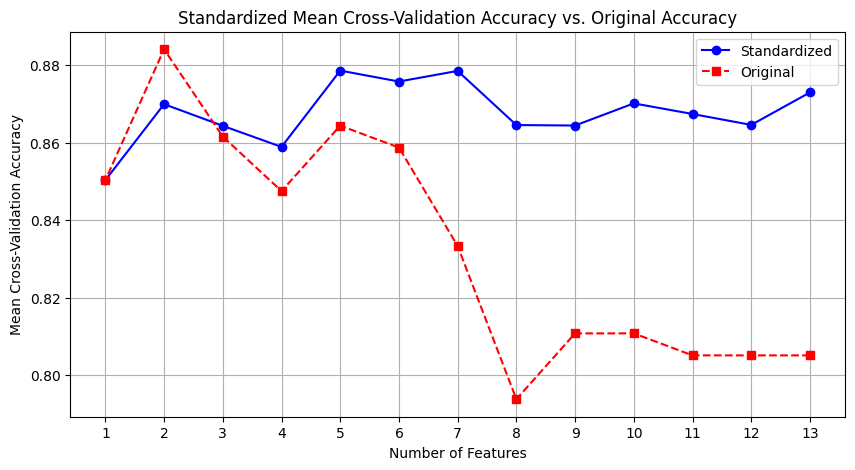

In [17]:
number_of_features = list(range(len(best_validation_list), 0, -1))

plt.figure(figsize=(10,5))

# Plot the standardized data
plt.plot(number_of_features, best_validation_list_scaled, marker='o', label='Standardized', color='b')

# Plot the original data
plt.plot(number_of_features, best_validation_list, marker='s', linestyle='--', label='Original', color='r')

# Create title, label, legend, grid and xtick
plt.title('Standardized Mean Cross-Validation Accuracy vs. Original Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(number_of_features)

# Display the plot
plt.show()


Discussion:

*  By comparing the original and standardized mean cross validation score, the standardized score has much better performance and stability than original score because the x_train scaling process helps to centralize all the data and thus increase the model performance.


*  Meanwhile, the trend of validation score plot looks the same because standardization doesn't affect the distribution. Thus, the selection of essential features for classification also remain the same.


* The standardized model also has greater k value than original model. The relative higher number of neighbors help reduce the occurance of overfit.



## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

depth=np.arange(2,21) # set max_depth range from 2 to 20
split=np.arange(2,21) # set min_samples_split range from 2 to 20
best_dtscore = 0

# Creating hyper-parameter of depth i and split j, finding best cv score among all combinations
for i in depth:
  for j in split:

    dt_model = DecisionTreeClassifier(max_depth=i,min_samples_split=j,random_state=0)
    dt_score = cross_validate(dt_model, X_train_scaled, y_train, cv=5)
    mean_score = np.mean(dt_score['test_score'])
    if mean_score > best_dtscore:
      best_dtscore = mean_score
      index_depth = i
      index_split = j

print(f"Best CV score for standardized X_train is: {best_dtscore} by using Decision Tree model with depth {index_depth} and splits {index_split}")


# KNN by using standardized X_train with full features
best_knnscore=0

for k in k_list:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn, X_train_scaled, y_train, cv=5)
  mean_score = scores['test_score'].mean()

  if mean_score > best_knnscore: # store best validation score
    best_knnscore = mean_score
    num_neighbor = k

print()
print(f"Best CV score for standardized X_train using KNN model is: {best_knnscore} with number of neighbors: {num_neighbor}")



Best CV score for standardized X_train is: 0.8756539235412475 by using Decision Tree model with depth 3 and splits 2

Best CV score for standardized X_train using KNN model is: 0.8729577464788733 with number of neighbors: 7


In [25]:
print('The decision tree Cross Validation accuracy is greater than KNN:',best_dtscore - best_knnscore)

The decision tree Cross Validation accuracy is greater than KNN: 0.0026961770623742387


After comparing the maximum cross validation score between all hyper-parameter combinations of DT tree and KNN, both models generate CV accuracy beyond 87%. The decision tree clasifier generates a slightly higher score, which is 0.2696% higher than knn CV accuracy. Both decision tree and KNN model can provide an excellent performance on training data.

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [29]:
# Model selection

# The best CV score occurs at part 3 feature removal until two features left, with neighbors = 5
# Dropping the 11 features for both training and testing, and store the remaining into X_train_copy
X_train_drop = X_train.drop(columns=['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM', 'PTRATIO', 'AGE', 'DIS'])
X_test_drop = X_test.drop(columns=['CHAS', 'RAD', 'INDUS', 'NOX', 'ZN', 'TAX', 'B', 'CRIM', 'PTRATIO', 'AGE', 'DIS'])

# Fitting the training data into model, and implement X_test data
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_drop,y_train)
knn_predict = knn.predict(X_test_drop)
testing_score = 100*(1-sum(abs(knn_predict-y_test))/len(knn_predict))

print(f"Best KNN Train score: {max(best_validation_list)*100}")
print("Corresponding KNN Test score:", testing_score)

Best KNN Train score: 88.41046277665995
Corresponding KNN Test score: 80.26315789473684


The best cv accuracy is 0.8841 occurs in part 3 when k=5, and only two features left ('RM', 'LSTAT') in unstandardized x_train.

By testing the model based on Best CV score in previous training models, the final testing score is 80.26. This score means that 80.26% of the model output(whether the house price is greater than median or below) is consistent with real data.

The phenomenon the testing score is slightly lower than training score(88.4%) results in model slight overfit. The existence of overfit may be caused by the sample size is too small, or the knn algorithm may not be the best fit for this dataset. But overall, the score for both training and testing are at a relative high level and the difference isn't excessively large, which is in an acceptable range.

For future improvement, we should consider increase the number of neightbors because the best cross validation accuracy does not always represent the best k-value nor test score. While trying k=7 using the exact same model, it gives test score of 83.55%. In addition, maybe we should not delete so much features because that may decrease the model stability and make the model too simple.

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/

Code reference
1. APS1070_Tutorial_1.ipynb
2. F23_APS1070_Week_3_Lecture_Code.ipynb
3. scikit-learn.org
4. seaborn.pydata.org


Declaration of using AI tools

1. Chatgpt prompts and responses link https://chat.openai.com/share/e1c9373b-a7ac-41a8-b7d8-ed0b23263ad8